In [2]:
import pandas as pd
import altair as alt
import numpy as np
import itertools
import sys

alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

Time & Iteration 

In [943]:
ns_attributes = [4,6,8,10,12,15,20,25,29]
n_expe = list(range(10))

explication_ratios = ['9/1', '49/1', '99/1'] # Without_Expe/Explication
exploration_types = ['Standard'] # Type of e_greedy

epsilon = 0.1 # Epsilon of exploration/exploitation
exploration_distance = 0.2 #distance of exploration

algos = ['Egreedy/Explanation']
algos = list( itertools.product(*[algos,explication_ratios]) )
cases = list( itertools.product(*[n_expe,algos,exploration_types,ns_attributes]) )

In [944]:
ns_attributes = [4,6,8]
explication_ratios = ['1'] # Without_Expe/Explication
exploration_types = ['Standard','Hybrid'] # Type of e_greedy
algos = ['Egreedy']
algos = list( itertools.product(*[algos,explication_ratios]) )
cases += list( itertools.product(*[n_expe,algos,exploration_types,ns_attributes]) )

In [945]:
ns_attributes = [4,6,8]
explication_ratios = ['1'] # Without_Expe/Explication
exploration_types = ['NewPanel'] # Type of e_greedy
algos = ['Egreedy']
algos = list( itertools.product(*[algos,explication_ratios]) )
cases += list( itertools.product(*[n_expe,algos,exploration_types,ns_attributes]) )

In [946]:
ns_attributes = [4,6,8,10,12,15,20,25,29]
n_expe = list(range(10))
explication_ratios = ['1'] # Without_Expe/Explication
exploration_types = ['Standard'] # Type of e_greedy
algos = ['Explanation']
algos = list( itertools.product(*[algos,explication_ratios]) )
cases += list( itertools.product(*[n_expe,algos,exploration_types,ns_attributes]) )

If we plot Semantic_2

In [813]:
ns_attributes = [4,6,8,10,12,15,20,25,29]
explication_ratios = ['1'] # Without_Expe/Explication
exploration_types = ['UCB','Standard','Softmax'] # Type of e_greedy
algos = ['MAB']
algos = list( itertools.product(*[algos,explication_ratios]) )
cases += list( itertools.product(*[n_expe,algos,exploration_types,ns_attributes]) )


ns_attributes = [4,6,8,10]
explication_ratios = ['1'] # Without_Expe/Explication
exploration_types = ['Thompson'] # Type of e_greedy
algos = ['MAB']
algos = list( itertools.product(*[algos,explication_ratios]) )
cases += list( itertools.product(*[n_expe,algos,exploration_types,ns_attributes]) )


If we plot Random

In [947]:
ns_attributes = [4,6]
explication_ratios = ['1'] # Without_Expe/Explication
exploration_types = ['Standard'] # Type of e_greedy
algos = ['Random']
algos = list( itertools.product(*[algos,explication_ratios]) )
cases += list( itertools.product(*[n_expe,algos,exploration_types,ns_attributes]) )

In [955]:
resu_total = pd.DataFrame(columns=['Algo','idx','nb_attr','#iteration','total_time'])

for i,case in enumerate(cases):
    idx = case[0]
    algos = case[1][0]
    explication_ratio = [int(k) for k in case[1][1].split('/')]
    exploration_type = case[2]
    nb_attr = case[3]
    
    if algos != 'Random':
        directory_path = "experiment/results/One_panel"
        result_file_path = f"{directory_path}/{algos.split('/')}_{explication_ratio}_{exploration_type}_{nb_attr}_{idx}.csv"

        df = pd.read_csv(result_file_path,sep=',')

        if len(df)==0:
            continue

        if np.any(df.isnull()) == True:
            df_ = df.tail(2).values

            nb_nan = 0

            for i in df_:
                if len(i[0].split(' '))>1:
                    nb_nan+=1

            if nb_nan == 2:
                i = 3
            else:
                i = 2
            
            if nb_attr > 20:
                i=4
                
            df = df.tail(i)
        else:   
            df = df.tail(1)

        name = ''

        if algos == 'Explanation':
            name = 'Explanation-100'
        elif algos == 'Egreedy/Explanation':
            if case[1][1] == '9/1':
                name = 'Explanation-10'
            if case[1][1] == '49/1':
                name = ' Explanation-2'
            if case[1][1] == '99/1':
                name = ' Explanation-1'
        else:
            if exploration_type=='Standard':
                #name = '  ε-greedy-E'
                name = '   ε-greedy-D-far-panel'
            elif exploration_type=='NewPanel':
                name = '  ε-greedy-D-new-panel'
            elif exploration_type=='Hybrid':
                name = '  ε-greedy-D-alternating'
            elif exploration_type=='UCB':
                name = ' UCB'
            elif exploration_type=='Thompson':
                name = '  Thompson'
            elif exploration_type=='Softmax':
                name = 'Softmax'

        ite = df.values[0][0]
        total_time = df.values[0][6]
        
        if nb_attr > 20 :
            if len(ite) > 10:
                ite = df.values[1][0]
                total_time = df.values[1][6]
            
        resu_total.loc[len(resu_total)] = [ name, idx,nb_attr,ite, total_time ]
    
    else:
        directory_path = "experiment/results/Random"
        result_file_path = f"{directory_path}/Random_{nb_attr}_{idx}.csv"
        
        df = pd.read_csv(result_file_path)
        
        if len(df)==0:
            continue
            
        df = df.tail(1)
        
        ite = df.values[0][1]
        total_time = df.values[0][7]
        
        name = 'Random'
        
        resu_total.loc[len(resu_total)] = [ name, idx,nb_attr,ite, total_time ]
        

In [956]:
resu_total = resu_total.drop(columns=['idx'])
resu_total.sort_values(by='Algo')

In [962]:
sort_legend = ['Random','ε-greedy-D-far-panel','ε-greedy-D-alternating','ε-greedy-D-new-panel',
                                  'Explanation-1','Explanation-2','Explanation-10','Explanation-100']

sort_legend = []

chart_lines = alt.Chart(resu_total).mark_line().encode(
    alt.X('nb_attr', type='nominal', bin=False, #sort=[4,6,8,10], 
        axis=alt.Axis(title='# attributes',labelFontSize=25,labelAngle=0,titleFontSize=20,
                    titleFont = 'Time New Roman',labelFont='Time New Roman',
                    abelFontStyle='bold', titleFontStyle='italic')
    ),
    
    alt.Y('mean(total_time):Q', scale=alt.Scale(type='log', domain=(0.01,1000000)),
          axis=alt.Axis(title="Time (sec, logscale)", format='s', tickCount=5, grid=True ,
                        labelFontSize=25, labelAngle=0, titleFontSize=26,
                        titleFont = 'Time New Roman',labelFont='Time New Roman',
                        labelFontStyle='bold', titleFontStyle='italic')
    ),
    
    color = alt.Color('Algo', type='nominal', bin=False, title='',
                      #scale=alt.Scale(range=['rgb(140, 86, 75)','rgb(255, 127, 0)','rgb(57, 59, 121)',
                      #'rgb(99, 121, 57)','rgb(165, 81, 148)']),
                      
                      #'rgb(127, 127, 127)',
                      scale=alt.Scale(range=['rgb(31, 119, 180)','rgb(255, 127, 14)','rgb(44, 160, 44)',
                    'rgb(214, 39, 40)','rgb(148, 103, 189)','rgb(140, 86, 75)','rgb(227, 119, 194)','rgb(127, 127, 127)','rgb(99, 121, 57)']),
                    ),
    
    strokeDash=alt.StrokeDash('Algo', type='nominal', bin=False, title='',\
        scale=alt.Scale(range=[ [25,2],[15,2],[11,2],[8,2],[4,2],[2,2],[],[1,2]]),
        legend=alt.Legend(orient='bottom', columns=4, titleFontSize=250, labelFontSize=20, labelFontStyle='bold',
                           titleFontStyle='italic',titleFont = 'Time New Roman',labelFont='Time New Roman',
                              symbolSize=1800,symbolStrokeWidth=3),
        )
    
).properties(
    width = 700,
    height = 300,
)

error_bars = alt.Chart(resu_total).mark_errorbar(ticks=True).encode(
        alt.X('nb_attr', type='nominal', bin=False, 
         axis=alt.Axis(title='# attributes',labelFontSize=25,labelAngle=0,titleFontSize=20,
                        titleFont = 'Time New Roman',labelFont='Time New Roman',
                        labelFontStyle='bold', titleFontStyle='italic')
        ),
        
        alt.Y('total_time:Q', axis=alt.Axis(title='Time (sec, logscale)', format='s',tickCount=5, grid=True )),
        
        shape = alt.Shape('Algo', type='nominal', bin=False, title='', legend=None),#, sort=sort_legend),
        
        color = alt.Color('Algo', type='nominal', bin=False, title='',#scale=alt.Scale(scheme='category10'),
                     #scale=alt.Scale(range=['rgb(140, 86, 75)','rgb(255, 127, 0)','rgb(57, 59, 121)',
                    #'rgb(99, 121, 57)','rgb(165, 81, 148)']),
                    scale=alt.Scale(range=['rgb(31, 119, 180)','rgb(255, 127, 14)','rgb(44, 160, 44)',
                    'rgb(214, 39, 40)','rgb(148, 103, 189)','rgb(140, 86, 75)','rgb(227, 119, 194)','rgb(127, 127, 127)']),
                    legend=None
        ),
).properties(
    width = 700,
    height = 300,
)

chart_point = alt.Chart(resu_total).mark_point().encode(
    alt.X('nb_attr', type='nominal', bin=False,#sort=[4,6,8,10,12,15,16,20], 
        axis=alt.Axis(title='# attributes',labelFontSize=25,labelAngle=0,titleFontSize=20,
                      titleFont = 'Time New Roman',labelFont='Time New Roman',
                      labelFontStyle='bold', titleFontStyle='italic')
    ),
    
    alt.Y('mean(total_time):Q', scale=alt.Scale(type='log'),
          axis=alt.Axis(title="Time (sec, logscale)", format='s',tickCount=5, grid=True ,
                        labelFontSize=25,labelAngle=0,titleFontSize=26,
                        titleFont = 'Time New Roman',labelFont='Time New Roman',
                        labelFontStyle='bold', titleFontStyle='italic')
    ),
    
    color = alt.Color('Algo', type='nominal', bin=False, title='',#scale=alt.Scale(scheme='category10'),
                       #scale=alt.Scale(range=['rgb(140, 86, 75)','rgb(255, 127, 0)','rgb(57, 59, 121)',
                        #'rgb(99, 121, 57)','rgb(165, 81, 148)']),
                        legend=None,
                        scale=alt.Scale(range=['rgb(31, 119, 180)','rgb(255, 127, 14)','rgb(44, 160, 44)',
                        'rgb(214, 39, 40)','rgb(148, 103, 189)','rgb(140, 86, 75)','rgb(227, 119, 194)','rgb(127, 127, 127)']),
                     ),
    
    shape = alt.Shape('Algo', type='nominal', bin=False, title='', legend=None),
    
).properties(
    width = 700,
    height = 300,
)


global_chart = alt.layer(error_bars,chart_lines, chart_point, data=resu_total).\
resolve_scale(strokeDash='independent', color='independent').configure_legend(labelLimit= 0)


In [963]:
global_chart # attrbiutes X Time

alt.LayerChart(...)

In [964]:
sort_legend = ['Random','ε-greedy-D-far-panel','ε-greedy-D-alternating','ε-greedy-D-new-panel',
                                  'Explanation-1','Explanation-2','Explanation-10','Explanation-100']

sort_legend = []

chart_lines = alt.Chart(resu_total).mark_line().encode(
    alt.X('nb_attr', type='nominal', bin=False,#sort=[4,6,8,10], 
           axis=alt.Axis(title='# attributes',labelFontSize=25,labelAngle=0,titleFontSize=20,
                         titleFont = 'Time New Roman',labelFont='Time New Roman',
                          labelFontStyle='bold', titleFontStyle='italic')
    ),
    
    alt.Y('mean(#iteration)', scale=alt.Scale(type='log', domain=(1,100001)),
          axis=alt.Axis(title="# steps (logscale)", format='s', tickCount=3, grid=True ,
                        labelFontSize=25, labelAngle=0, titleFontSize=26,
                        titleFont = 'Time New Roman',labelFont='Time New Roman',
                        labelFontStyle='bold', titleFontStyle='italic')
        ),
    
    color = alt.Color('Algo', type='nominal', bin=False, title='',
                      #scale=alt.Scale(range=['rgb(140, 86, 75)','rgb(255, 127, 0)','rgb(57, 59, 121)',
                     #'rgb(99, 121, 57)','rgb(165, 81, 148)']),
                      
                      #'rgb(127, 127, 127)',
                      scale=alt.Scale(range=['rgb(31, 119, 180)','rgb(255, 127, 14)','rgb(44, 160, 44)',
                    'rgb(214, 39, 40)','rgb(148, 103, 189)','rgb(140, 86, 75)','rgb(227, 119, 194)','rgb(127, 127, 127)'])
        ),
    
    strokeDash=alt.StrokeDash('Algo', type='nominal', bin=False, title='',\
        scale=alt.Scale(range=[ [25,2],[15,2],[11,2],[8,2],[4,2],[2,2],[],[1,2]]),
        legend=alt.Legend(orient='bottom', columns=4, titleFontSize=20, labelFontSize=23, 
                          labelFontStyle='bold',labelFont='Time New Roman',symbolSize=1800, symbolStrokeWidth=3),
        )
    
).properties(
    width = 700,
    height = 300,
)

error_bars = alt.Chart(resu_total).mark_errorbar(ticks=True).encode(
        alt.X('nb_attr', type='nominal', bin=False, 
              axis=alt.Axis(title='# attributes',labelFontSize=25,labelAngle=0,titleFontSize=18,
                            titleFont = 'Time New Roman',labelFont='Time New Roman',
                            labelFontStyle='bold', titleFontStyle='italic')
        ),
        
        alt.Y('#iteration', axis=alt.Axis(title='# steps (logscale)', format='s',tickCount=3, grid=True )),
        
        shape = alt.Shape('Algo', type='nominal', bin=False, title='', legend=None),
        
        color = alt.Color('Algo', type='nominal', bin=False, title='',#scale=alt.Scale(scheme='category10'),
                      #scale=alt.Scale(range=['rgb(140, 86, 75)','rgb(255, 127, 0)','rgb(57, 59, 121)',
                    #'rgb(99, 121, 57)','rgb(165, 81, 148)']),

                    scale=alt.Scale(range=['rgb(31, 119, 180)','rgb(255, 127, 14)','rgb(44, 160, 44)',
                    'rgb(214, 39, 40)','rgb(148, 103, 189)','rgb(140, 86, 75)','rgb(227, 119, 194)','rgb(127, 127, 127)']),
                    legend=None
        ),
).properties(
    width = 700,
    height = 300,
)

chart_point = alt.Chart(resu_total).mark_point().encode(
    alt.X('nb_attr', type='nominal', bin=False,#sort=[4,6,8,10,12,15,16,20], 
           axis=alt.Axis(title='# attributes',labelFontSize=25,labelAngle=0,titleFontSize=20,
                         titleFont = 'Time New Roman',labelFont='Time New Roman',
                         labelFontStyle='bold', titleFontStyle='italic')
    ),
    
    alt.Y('mean(#iteration)', scale=alt.Scale(type='log'),
           axis=alt.Axis(title="# steps (logscale)", format='s',tickCount=3, grid=True ,
                         labelFontSize=25,labelAngle=0,titleFontSize=26,
                         titleFont = 'Time New Roman',labelFont='Time New Roman',
                         labelFontStyle='bold', titleFontStyle='italic')
    ),
    
    color = alt.Color('Algo', type='nominal', bin=False, title='',#scale=alt.Scale(scheme='category10'),
                       #scale=alt.Scale(range=['rgb(140, 86, 75)','rgb(255, 127, 0)','rgb(57, 59, 121)',
                       #'rgb(99, 121, 57)','rgb(165, 81, 148)']),
                        
                        legend=None,
                    
                        scale=alt.Scale(range=['rgb(31, 119, 180)','rgb(255, 127, 14)','rgb(44, 160, 44)',
                        'rgb(214, 39, 40)','rgb(148, 103, 189)','rgb(140, 86, 75)','rgb(227, 119, 194)','rgb(127, 127, 127)']) 
    ),
    
    shape = alt.Shape('Algo', type='nominal', bin=False, title='', legend=None),
    
).properties(
    width = 700,
    height = 300,
)


global_chart = alt.layer(error_bars,chart_lines, chart_point, data=resu_total).\
resolve_scale(strokeDash='independent', color='independent').configure_legend(labelLimit= 0)


In [965]:
global_chart # attributes X steps

alt.LayerChart(...)

Quality 

In [82]:
from sklearn.metrics import precision_recall_fscore_support

In [166]:
ns_attributes = [8]
n_expe = list(range(10))

explication_ratios = ['9/1', '49/1', '99/1'] # Without_Expe/Explication
exploration_types = ['Standard'] # Type of e_greedy

epsilon = 0.1 # Epsilon of exploration/exploitation
exploration_distance = 0.2 #distance of exploration

algos = ['Egreedy/Explanation']
algos = list( itertools.product(*[algos,explication_ratios]) )
cases = list( itertools.product(*[algos,exploration_types,ns_attributes]) )

In [167]:
explication_ratios = ['1'] # Without_Expe/Explication
exploration_types = ['Standard','Hybrid','NewPanel'] # Type of e_greedy
algos = ['Egreedy']
algos = list( itertools.product(*[algos,explication_ratios]) )
cases += list( itertools.product(*[algos,exploration_types,ns_attributes]) )

In [168]:
exploration_types = ['Standard',] # Type of e_greedy
algos = ['Explanation']
algos = list( itertools.product(*[algos,explication_ratios]) )
cases += list( itertools.product(*[algos,exploration_types,ns_attributes]) )

If we plot Semantic_2

In [1630]:
explication_ratios = ['1'] # Without_Expe/Explication
exploration_types = ['UCB','Standard','Softmax','Thompson'] # Type of e_greedy
algos = ['MAB']
algos = list( itertools.product(*[algos,explication_ratios]) )
cases += list( itertools.product(*[algos,exploration_types,ns_attributes]) )

In [169]:
resu_total = pd.DataFrame(columns=['Algo','idx','iteration','Precision','Recall','F1'])

#targets = np.array([[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0]])
targets = np.array([[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1]])

for i,case in enumerate(cases):
    algos = case[0][0]
    explication_ratio = [int(k) for k in case[0][1].split('/')]
    exploration_type = case[1]
    nb_attr = case[2]
    
    dfs = []
    max_len = 0
    
    for idx in n_expe:
        
        directory_path = "experiment/results/Two_panels"
        result_file_path = f"{directory_path}/{algos.split('/')}_{explication_ratio}_{exploration_type}_{nb_attr}_{idx}.csv"

        df = pd.read_csv(result_file_path,sep=',')

        if len(df)==0:
            continue
        
        if len(df) > max_len:
            max_len = len(df)
        
        dfs.append(df)
    
    print(result_file_path)
    
    name = ''

    if algos == 'Explanation':
        name = 'Explanation-100'
    elif algos == 'Egreedy/Explanation':
        if case[0][1] == '9/1':
            name = 'Explanation-10'
        if case[0][1] == '49/1':
            name = ' Explanation-2'
        if case[0][1] == '99/1':
            name = ' Explanation-1'
    else:
        if exploration_type=='Standard':
            #name = 'ε-greedy-E'
            name = '   ε-greedy-D-far-panel'
        elif exploration_type=='NewPanel':
            name = '  ε-greedy-D-new-panel'
        elif exploration_type=='Hybrid':
            name = '  ε-greedy-D-alternating'
        elif exploration_type=='UCB':
            name = 'UCB'
        elif exploration_type=='Thompson':
            name = 'Thompson'
        elif exploration_type=='Softmax':
            name = 'Softmax'
    
    for idx,df in enumerate(dfs):
        iteration = 0
        point = 0
        
        len_df = len(df)
        df = df.values
        
        loop = True
        last = True
        
        finds = []
        
        while loop:
            k = df[iteration]
            find_one = k[7]
            
            found = np.fromstring(k[9][1:-1], dtype=int, sep=' ')
            found = np.where(found==2, 1, found)
            
            if find_one != 'None' and len(finds) != len(targets):
                find_one = int(find_one)
                finds.append(find_one)
                
            prec,rec,f_one = 0,0,(len(finds))/len(targets)
            
            for idx_2, target in enumerate(targets):
                if idx_2 not in finds:
                    len_ = len(found)-len(target)
                    target_bis = np.concatenate([target,np.zeros(len_)])
                    precision,recall,f1, supp = precision_recall_fscore_support(target_bis,found,average='binary')

                    if last==True:
                        prec += precision
                        rec += recall
                        f_one = f_one+f1
                        
                        if f_one > 1:
                            f_one = 0.9
            
            div = 2
            if len(finds) >0:
                div = 1

            resu_total.loc[len(resu_total)] = [ name, idx, point ,prec/len(targets), rec/len(targets), f_one/div ]

            iteration += 1
            point += 1

            if iteration >= len_df:
                iteration = len(df)-1
                last = False
                
            if point > max_len:
                loop = False

experiment/results/Two_panels/['Egreedy', 'Explanation']_[9, 1]_Standard_6_9.csv
experiment/results/Two_panels/['Egreedy', 'Explanation']_[49, 1]_Standard_6_9.csv
experiment/results/Two_panels/['Egreedy', 'Explanation']_[99, 1]_Standard_6_9.csv
experiment/results/Two_panels/['Egreedy']_[1]_Standard_6_9.csv
experiment/results/Two_panels/['Egreedy']_[1]_Hybrid_6_9.csv
experiment/results/Two_panels/['Egreedy']_[1]_NewPanel_6_9.csv
experiment/results/Two_panels/['Explanation']_[1]_Standard_6_9.csv


In [170]:
resu_total_2 = resu_total

In [172]:
resu_total = resu_total_2

resu_total = resu_total.groupby(['Algo','iteration'])['F1'].mean().reset_index()
resu_total['MASK_1'] = resu_total.iteration.apply(lambda x : True if x%2000==0 else False)
resu_total['MASK_2'] = resu_total.F1.apply(lambda x : True if x == 1  else False)
resu_total = resu_total[resu_total.MASK_1 | resu_total.MASK_2]

In [173]:
for idx, alg in enumerate( resu_total.Algo.unique() ):
    local = resu_total[(resu_total.Algo == alg) & (resu_total.MASK_2==False)]
    if idx == 0:
        l = local
    else:
        l = pd.concat([l,local])
        
    local = resu_total[(resu_total.Algo == alg) & (resu_total.MASK_2==True)]
    l = pd.concat([l,local.head(1)])
    l = pd.concat([l,local.tail(1)])
    local.MASK_2 = local.iteration.apply(lambda x : True if x%2000==0 else False)
    local = local[local.MASK_2]
    l = pd.concat([l,local])

resu_total = l
maxi = resu_total.iteration.max()

/Users/bouarour_nassim/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/Users/bouarour_nassim/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/Users/bouarour_nassim/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

In [174]:
for alg in resu_total.Algo.unique():
    resu_total.loc[len(resu_total)*10000] = [alg, maxi, 1, True, True]

In [175]:
chart_lines = alt.Chart(resu_total).mark_line(interpolate='basis').encode(
    alt.X('iteration', type='nominal', bin=False,
           axis=alt.Axis(title='# steps', labelFontSize=16,labelAngle=60,titleFontSize=23,
                         titleFont = 'Time New Roman',labelFont='Time New Roman',
                         labelFontStyle='bold', titleFontStyle='italic')
    ),
    
    alt.Y('mean(F1)', axis=alt.Axis(title="F1-Score", labelFontSize=25, labelAngle=0, titleFontSize=26,
                                    titleFont = 'Time New Roman',labelFont='Time New Roman',
                                    labelFontStyle='bold', titleFontStyle='italic')
    ),
    
    color = alt.Color('Algo', type='nominal', bin=False, title='',
                      scale=alt.Scale(range=['rgb(31, 119, 180)','rgb(255, 127, 14)','rgb(44, 160, 44)',
                    'rgb(214, 39, 40)','rgb(148, 103, 189)','rgb(140, 86, 75)','rgb(227, 119, 194)','rgb(127, 127, 127)']), 
    ),
    
    strokeDash=alt.StrokeDash('Algo', type='nominal', bin=False, title='',\
                 scale=alt.Scale(range=[ [25,2],[15,2],[11,2],[8,2],[4,2],[2,2],[] ]),
                legend=alt.Legend(orient='bottom', columns=4, titleFontSize=250, labelFontSize=16, labelFontStyle='bold',
                                 titleFontStyle='italic',titleFont = 'Time New Roman',labelFont='Time New Roman',
                                 symbolSize=1800,symbolStrokeWidth=3)
    )
    
).properties(
    width = 900,
    height = 350,
)


global_chart = alt.layer(chart_lines, data=resu_total).\
resolve_scale(strokeDash='independent', color='independent')


In [176]:
global_chart #Steps X F1_Score

alt.LayerChart(...)

In [ ]:
resu_total = resu_total_2

In [ ]:
resu_total = resu_total.replace(' ε-greedy-D-far-panel','   ε-greedy-D-far-panel')
resu_total = resu_total.replace(' ε-greedy-D-new-panel','  ε-greedy-D-new-panel')
resu_total = resu_total.replace(' ε-greedy-D-alternating','  ε-greedy-D-alternating')
resu_total = resu_total.replace('Explanation-2',' Explanation-2')
resu_total = resu_total.replace('Explanation-1',' Explanation-1')

In [ ]:
res = pd.DataFrame(columns=resu_total.columns.tolist()+['clicks'])

for idx__, alg in enumerate(resu_total.Algo.unique()):
    
    local = resu_total[resu_total.Algo==alg]
    
    if alg == ' Explanation-1':
        local['clicks'] = local.iteration.apply( lambda x : int((1+1/100)*x) )
    elif alg == ' Explanation-2':
        local['clicks'] = local.iteration.apply( lambda x : int((1+1/50)*x) )
    elif alg == 'Explanation-10':
        local['clicks'] = local.iteration.apply( lambda x : int((1+1/10)*x ) )
    elif alg == 'Explanation-100':
        local['clicks'] = local.iteration.apply( lambda x : int(2*x) )
    else:
        local['clicks'] = local.iteration
        
    res = pd.concat([res,local])

In [ ]:
resu_total = res.groupby(['Algo','clicks'])['F1'].mean().reset_index()
resu_total['MASK_1'] = resu_total.clicks.apply(lambda x : True if x%2000==0 else False)
resu_total['MASK_2'] = resu_total.F1.apply(lambda x : True if x == 1  else False)
resu_total = resu_total[resu_total.MASK_1 | resu_total.MASK_2]

In [ ]:
for idx, alg in enumerate( resu_total.Algo.unique() ):
    local = resu_total[(resu_total.Algo == alg) & (resu_total.MASK_2==False)]
    if idx == 0:
        l = local
    else:
        l = pd.concat([l,local])
        
    local = resu_total[(resu_total.Algo == alg) & (resu_total.MASK_2==True)]
    l = pd.concat([l,local.head(1)])
    l = pd.concat([l,local.tail(1)])
    local.MASK_2 = local.clicks.apply(lambda x : True if x%2000==0 else False)
    local = local[local.MASK_2]
    l = pd.concat([l,local])

resu_total = l
maxi = resu_total.clicks.max()

In [ ]:
for alg in resu_total.Algo.unique():
    resu_total.loc[len(resu_total)*10000] = [alg, maxi, 1, True, True]

In [ ]:
chart_lines = alt.Chart(resu_total).mark_line(interpolate='basis').encode(
    alt.X('clicks', type='nominal', bin=False,
          axis=alt.Axis(title='# clicks', labelFontSize=16,labelAngle=60,titleFontSize=23,
                        titleFont = 'Time New Roman',labelFont='Time New Roman',
                        labelFontStyle='bold', titleFontStyle='italic')
    ),
    
    alt.Y('mean(F1)', axis=alt.Axis(title="F1-Score", labelFontSize=25, labelAngle=0, titleFontSize=26,
                                    titleFont = 'Time New Roman',labelFont='Time New Roman',
                                    labelFontStyle='bold', titleFontStyle='italic')
    ),
    
    color = alt.Color('Algo', type='nominal', bin=False, title='',
                      scale=alt.Scale(range=['rgb(31, 119, 180)','rgb(255, 127, 14)','rgb(44, 160, 44)',
                    'rgb(214, 39, 40)','rgb(148, 103, 189)','rgb(140, 86, 75)','rgb(227, 119, 194)','rgb(99, 121, 57)']),
    ),
    
    strokeDash=alt.StrokeDash('Algo', type='nominal', bin=False, title='',\
                scale=alt.Scale(range=[ [25,2],[15,2],[11,2],[8,2],[4,2],[2,2],[],[8,2] ]),
                legend=alt.Legend(orient='bottom', columns=4, titleFontSize=250, labelFontSize=18, labelFontStyle='bold',
                                  titleFontStyle='italic',titleFont = 'Time New Roman',labelFont='Time New Roman',
                                  symbolSize=2800,symbolStrokeWidth=3)
    )
    
).properties(
    width = 900,
    height = 350,
)


global_chart = alt.layer(chart_lines, data=resu_total).\
resolve_scale(strokeDash='independent', color='independent').configure_legend(labelLimit= 0)


In [ ]:
global_chart #Clicks X F1_Score

Semantic 2

In [681]:
ns_attributes = [8]
panels = [3,6,9,12]

n_expe = list(range(10))

explication_ratios = ['9/1']#, '49/1', '99/1'] # Without_Expe/Explication
exploration_types = ['Standard'] # Type of e_greedy

epsilon = 0.1 # Epsilon of exploration/exploitation
exploration_distance = 0.2 #distance of exploration

algos = ['Egreedy/Explanation']
algos = list( itertools.product(*[algos,explication_ratios]) )
cases = list( itertools.product(*[n_expe,algos,exploration_types,ns_attributes,panels]) )

explication_ratios = ['1'] # Without_Expe/Explication
exploration_types = ['UCB','Standard','Softmax','Thompson'] # Type of e_greedy
algos = ['MAB']
algos = list( itertools.product(*[algos,explication_ratios]) )
cases += list( itertools.product(*[n_expe,algos,exploration_types,ns_attributes,panels]) )

In [682]:
resu_total = pd.DataFrame(columns=['Algo','idx','nb_attr','#iteration','total_time','panels'])

for i,case in enumerate(cases):
    idx = case[0]
    algos = case[1][0]
    explication_ratio = [int(k) for k in case[1][1].split('/')]
    exploration_type = case[2]
    nb_attr = case[3]
    
    pan = case[4]
    
    if algos != 'Random':
        directory_path = f"experiment/results/Mab_panel_nb_targets (8 attr)/{pan}_panels"
        result_file_path = f"{directory_path}/{algos.split('/')}_{explication_ratio}_{exploration_type}_{nb_attr}_{idx}.csv"

        df = pd.read_csv(result_file_path,sep=',')

        if len(df)==0:
            continue

        if np.any(df.isnull()) == True:
            df_ = df.tail(2).values

            nb_nan = 0

            for i in df_:
                if len(i[0].split(' '))>1:
                    nb_nan+=1

            if nb_nan == 2:
                i = 3
            else:
                i = 2

            df = df.tail(i)
        else:   
            df = df.tail(1)

        name = ''

        if algos == 'Explanation':
            name = 'Explanation-100'
        elif algos == 'Egreedy/Explanation':
            if case[1][1] == '9/1':
                name = '  Explanation-10'
            if case[1][1] == '49/1':
                name = ' Explanation-2'
            if case[1][1] == '99/1':
                name = ' Explanation-1'
        else:
            if exploration_type=='Standard':
                name = '  ε-greedy-E'
                #name = '   ε-greedy-D-far-panel'
            elif exploration_type=='NewPanel':
                name = '  ε-greedy-D-new-panel'
            elif exploration_type=='Hybrid':
                name = '  ε-greedy-D-alternating'
            elif exploration_type=='UCB':
                name = ' UCB'
            elif exploration_type=='Thompson':
                name = '  Thompson'
            elif exploration_type=='Softmax':
                name = 'Softmax'

        ite = df.values[0][0]
        total_time = df.values[0][6]

        resu_total.loc[len(resu_total)] = [ name, idx,nb_attr,ite, total_time, pan ]

In [699]:
chart_lines = alt.Chart(resu_total).mark_line().encode(
    alt.X('panels', type='nominal', bin=False,
                    axis=alt.Axis(title='# panels in target',labelFontSize=25,labelAngle=0,titleFontSize=20,
                                  titleFont = 'Time New Roman',labelFont='Time New Roman',
                                  labelFontStyle='bold', titleFontStyle='italic')
    ),
    
    alt.Y('mean(total_time):Q', scale=alt.Scale(type='log'),
                                  axis=alt.Axis(title="Time (sec, logscale)", format='s', tickCount=4, grid=True ,
                                                labelFontSize=25, labelAngle=0, titleFontSize=26,
                                                titleFont = 'Time New Roman',labelFont='Time New Roman',
                                                labelFontStyle='bold', titleFontStyle='italic')
    ),
    
    color = alt.Color('Algo', type='nominal', bin=False, title='', #scale=alt.Scale(scheme='category10'),
                      scale=alt.Scale(range=['rgb(140, 86, 75)','rgb(255, 127, 0)','rgb(57, 59, 121)',
                        'rgb(99, 121, 57)','rgb(165, 81, 148)']),
    ),
    
    strokeDash=alt.StrokeDash('Algo', type='nominal', bin=False, title='',\
                    scale=alt.Scale(range=[ [2,2],[25,2],[15,2],[11,2],[8,2],[4,2],[2,2],[]]),
                    legend=alt.Legend(orient='bottom', columns=3, titleFontSize=250, labelFontSize=20, 
                                      labelFontStyle='bold',titleFontStyle='italic',titleFont = 'Time New Roman',
                                      labelFont='Time New Roman',symbolSize=1800,symbolStrokeWidth=3)
    )
    
).properties(
    width = 700,
    height = 300,
)

error_bars = alt.Chart(resu_total).mark_errorbar(ticks=True).encode(
        alt.X('panels', type='nominal', bin=False, 
                             axis=alt.Axis(title='# panels in target',labelFontSize=25,labelAngle=0,titleFontSize=21,
                                           titleFont = 'Time New Roman',labelFont='Time New Roman',
                                           labelFontStyle='bold', titleFontStyle='italic')
        ),
        
        alt.Y('total_time:Q', axis=alt.Axis(title='Time (sec, logscale)', format='s',tickCount=4, grid=True)),
        
        shape = alt.Shape('Algo', type='nominal', bin=False, title='', legend=None),
        
        color = alt.Color('Algo', type='nominal', bin=False, title='',#scale=alt.Scale(scheme='category10'),
                    scale=alt.Scale(range=['rgb(140, 86, 75)','rgb(255, 127, 0)','rgb(57, 59, 121)',
                        'rgb(99, 121, 57)','rgb(165, 81, 148)']),
                     legend=None
        )
).properties(
    width = 700,
    height = 300,
)

chart_point = alt.Chart(resu_total).mark_point().encode(
    alt.X('panels', type='nominal', bin=False,
                             axis=alt.Axis(title='# panels in target',labelFontSize=25,labelAngle=0,titleFontSize=20,
                                           titleFont = 'Time New Roman',labelFont='Time New Roman',
                                           labelFontStyle='bold', titleFontStyle='italic')
    ),
    
    alt.Y('mean(total_time):Q', scale=alt.Scale(type='log'),
                                  axis=alt.Axis(title="Time (sec, logscale)", format='s',tickCount=4, grid=True ,
                                                labelFontSize=25,labelAngle=0,titleFontSize=26,
                                                titleFont = 'Time New Roman',labelFont='Time New Roman',
                                                labelFontStyle='bold', titleFontStyle='italic')
    ),
    
    color = alt.Color('Algo', type='nominal', bin=False, title='',
                    scale=alt.Scale(range=['rgb(140, 86, 75)','rgb(255, 127, 0)','rgb(57, 59, 121)',
                        'rgb(99, 121, 57)','rgb(165, 81, 148)']),
                     legend=None
    ),
    
    shape = alt.Shape('Algo', type='nominal', bin=False, title='', legend=None),
    
).properties(
    width = 700,
    height = 300,
)


global_chart = alt.layer(error_bars,chart_lines, chart_point, data=resu_total).\
resolve_scale(strokeDash='independent', color='independent')


In [700]:
global_chart # panels X Time

alt.LayerChart(...)

In [697]:
sort_legend = ['Egreedy_Far_Panel','Egreedy_Alternating','Hybrid_99/1','Hybrid_49/11',
                                  'Egreedy_New_Panel','Hybrid_9/1','Explanation']

chart_lines = alt.Chart(resu_total).mark_line().encode(
    alt.X('panels', type='nominal', bin=False,#sort=[4,6,8,10,12,15,16,20], 
                    axis=alt.Axis(title='# panels in target',labelFontSize=25,labelAngle=0,titleFontSize=20,
                                  titleFont = 'Time New Roman',labelFont='Time New Roman',
                                  labelFontStyle='bold', titleFontStyle='italic')
    ),
    
    alt.Y('mean(#iteration)', scale=alt.Scale(type='log'),
                                axis=alt.Axis(title="# steps (logscale)", format="s", tickCount=2, grid=True ,
                                              labelFontSize=25, labelAngle=0, titleFontSize=26,
                                              titleFont = 'Time New Roman',labelFont='Time New Roman',
                                              labelFontStyle='bold', titleFontStyle='italic')
    ),
    
    color = alt.Color('Algo', type='nominal', bin=False, title='',
                      scale=alt.Scale(range=['rgb(140, 86, 75)','rgb(255, 127, 0)','rgb(57, 59, 121)',
                        'rgb(99, 121, 57)','rgb(165, 81, 148)'])
    ),
    
    strokeDash=alt.StrokeDash('Algo', type='nominal', bin=False, title='',\
                        scale=alt.Scale(range=[ [2,2],[25,2],[15,2],[11,2],[8,2],[4,2],[2,2],[]]),
                        legend=alt.Legend(orient='bottom', columns=3, titleFontSize=250, labelFontSize=20, labelFontStyle='bold',
                                          titleFontStyle='italic',titleFont = 'Time New Roman',labelFont='Time New Roman',
                                          symbolSize=1800,symbolStrokeWidth=3),
    )
    
).properties(
    width = 700,
    height = 300,
)

error_bars = alt.Chart(resu_total).mark_errorbar(ticks=True).encode(
        alt.X('panels', type='nominal', bin=False,
                         axis=alt.Axis(title='# panels in target',labelFontSize=25,labelAngle=0,titleFontSize=20,
                                       titleFont = 'Time New Roman',labelFont='Time New Roman',
                                       labelFontStyle='bold', titleFontStyle='italic')
        ),
        
        alt.Y('#iteration', axis=alt.Axis(title='# steps (logscale)',format="s", tickCount=2, grid=True)),
        
        shape = alt.Shape('Algo', type='nominal', bin=False, title='', legend=None,),
    
        color = alt.Color('Algo', type='nominal', bin=False, title='',
                    scale=alt.Scale(range=['rgb(140, 86, 75)','rgb(255, 127, 0)','rgb(57, 59, 121)',
                        'rgb(99, 121, 57)','rgb(165, 81, 148)']),
                     legend=None
        ),
).properties(
    width = 700,
    height = 300,
)

chart_point = alt.Chart(resu_total).mark_point().encode(
    alt.X('panels', type='nominal', bin=False,
                         axis=alt.Axis(title='# panels in target',labelFontSize=25,labelAngle=0,titleFontSize=20,
                                       titleFont = 'Time New Roman',labelFont='Time New Roman',
                                       labelFontStyle='bold', titleFontStyle='italic')
    ),
    
    alt.Y('mean(#iteration)', scale=alt.Scale(type='log'),
                            axis=alt.Axis(title="# steps (logscale)", format="s", tickCount=2, grid=True, 
                                          labelFontSize=25, labelAngle=0, titleFontSize=26,
                                          titleFont = 'Time New Roman',labelFont='Time New Roman',
                                          labelFontStyle='bold', titleFontStyle='italic')
    ),
    
    color = alt.Color('Algo', type='nominal', bin=False, title='',
                      scale=alt.Scale(range=['rgb(140, 86, 75)','rgb(255, 127, 0)','rgb(57, 59, 121)',
                        'rgb(99, 121, 57)','rgb(165, 81, 148)']),
                     legend=None
    ),
    
    shape = alt.Shape('Algo', type='nominal', bin=False, title='', legend=None),
    
).properties(
    width = 700,
    height = 300,
)


global_chart = alt.layer(error_bars,chart_lines, chart_point, data=resu_total).\
resolve_scale(strokeDash='independent', color='independent')


In [698]:
global_chart #panels X steps

alt.LayerChart(...)

Difference between two panels

In [251]:
from IPython.display import HTML

alt.renderers.enable('svg')

HTML('''
<svg height="0" width="0" xmlns="http://www.w3.org/2000/svg" version="1.1">
    <defs>

        <!-- From SVG stripe generator 
        https://www.coffee-break-designs.com/labs/svg_stripe_generator/ -->
        <pattern id="pattern_0" patternUnits="userSpaceOnUse" width="5" height="5" patternTransform="rotate(0)">
            <line x1="0" y="0" x2="0" y2="5" stroke="#CB37A5" stroke-width="15" />
        </pattern>
        
        <pattern id="pattern_1" patternUnits="userSpaceOnUse" width="5" height="5" patternTransform="rotate(45)">
            <line x1="0" y="0" x2="0" y2="5" stroke="#1F77B4" stroke-width="4" />
        </pattern>
        
        <pattern id="pattern_2" patternUnits="userSpaceOnUse" width="5" height="5" patternTransform="rotate(135)">
            <line x1="0" y="0" x2="0" y2="5" stroke="#FF7F0E" stroke-width="4" />
        </pattern>

        <pattern id="pattern_3" patternUnits="userSpaceOnUse" width="5" height="5" patternTransform="rotate(0)">
            <line x1="0" y="0" x2="0" y2="5" stroke="#2CA02C" stroke-width="4" />
        </pattern>
        
        <pattern id="pattern_4" patternUnits="userSpaceOnUse" width="5" height="5" patternTransform="rotate(90)">
            <line x1="0" y="0" x2="0" y2="5" stroke="#D62728" stroke-width="4" />
        </pattern>
        
        <pattern id="pattern_5" patternUnits="userSpaceOnUse" width="5" height="5" patternTransform="rotate(90)">
            <line x1="0" y="0" x2="0" y2="5" stroke="#9467BD" stroke-width="4" />
            <line x1="0" y="0" x2="5" y2="0" stroke="#9467BD" stroke-width="4" />
        </pattern>
        
        <pattern id="pattern_6" patternUnits="userSpaceOnUse" width="5" height="5" patternTransform="rotate(45)">
            <line x1="0" y="0" x2="5" y2="0" stroke="#A45827" stroke-width="4" />
            <line x1="0" y="0" x2="0" y2="5" stroke="#A45827" stroke-width="4" />
        </pattern>

    </defs>
</svg>
''')

In [252]:
pattern_scale = ({'range': ['url(#pattern_1)','url(#pattern_2)','url(#pattern_3)','url(#pattern_4)',
                 'url(#pattern_5)','url(#pattern_6)']})

In [253]:
ns_attributes = [4,6,8,10]
n_expe = list(range(10))

explication_ratios = ['9/1'] # Without_Expe/Explication
exploration_types = ['Standard'] # Type of e_greedy

epsilon = 0.1 # Epsilon of exploration/exploitation
exploration_distance = 0.2 #distance of exploration

algos = ['Egreedy/Explanation']
algos = list( itertools.product(*[algos,explication_ratios]) )
cases = list( itertools.product(*[n_expe,algos,exploration_types,ns_attributes]) )

In [254]:
explication_ratios = ['1'] # Without_Expe/Explication
exploration_types = ['UCB','Standard','Softmax','Thompson'] # Type of e_greedy
algos = ['MAB']
algos = list( itertools.product(*[algos,explication_ratios]) )
cases += list( itertools.product(*[n_expe,algos,exploration_types,ns_attributes]) )

In [327]:
resu_total = pd.DataFrame(columns=['Algo','idx','nb_attr','#iteration','total_time','target'])

for i,case in enumerate(cases):
    ites,times = [],[]
    
    idx = case[0]
    algos = case[1][0]
    explication_ratio = [int(k) for k in case[1][1].split('/')]
    exploration_type = case[2]
    nb_attr = case[3]
    
    directory_path = "experiment/results/Mab_panel (6 targets)"
    result_file_path = f"{directory_path}/{algos.split('/')}_{explication_ratio}_{exploration_type}_{nb_attr}_{idx}.csv"
    
    df = pd.read_csv(result_file_path,sep=',')
    
    if len(df)==0:
        continue
    
    if np.any(df.isnull()) == True:
        df = df[~df.target_found.isnull()]
        
    name = ''
    
    df = df[df.target_found!='None'].values
    
    if algos == 'Explanation':
        name = 'Explanation'
    elif algos == 'Egreedy/Explanation':
        name = f'Hybrid-{case[1][1]}'
    else:
        if exploration_type=='Standard':
            name = 'MAB-ε-greedy-E'
            #name = 'ε-greedy-D-far-panel'
        elif exploration_type=='NewPanel':
            name = 'ε-greedy-D-new-panel'
        elif exploration_type=='Hybrid':
            name = 'ε-greedy-D-alternating'
        elif exploration_type=='UCB':
            name = 'MAB-UCB'
        elif exploration_type=='Thompson':
            name = 'MAB-Thompson'
        elif exploration_type=='Softmax':
            name = 'MAB-Softmax'
            
    for j,target in enumerate(df):
        ite = int(target[0])
        total_time = target[6]
        
        if j==6:
            break
        if j != 0:
            ite = ite - sum(ites)
            total_time = total_time - sum(times)
            
        ites.append(ite)
        times.append(total_time)
        
        resu_total.loc[len(resu_total)] = [ name, idx, nb_attr, int(ite), total_time, f'target_{j+1}' ]

resu_total['#iteration'] = pd.to_numeric(resu_total['#iteration'])


In [329]:
ite_graphs = []
time_graphs = []

In [330]:
for alg in ['Hybrid-9/1', 'MAB-UCB', 'MAB-ε-greedy-E', 'MAB-Softmax','MAB-Thompson']:
    
    resu_explanation = resu_total[resu_total.Algo==alg]
    
    chart_lines = alt.Chart(resu_explanation).transform_calculate(
                  order="{'target_1':0, 'target_2': 1,'target_3':2, 'target_4': 3,'target_5':4, 'target_6': 5}[datum.variable]"  
                  ).mark_area(interpolate='basis').encode(
                    alt.X('nb_attr', type='nominal', bin=False,
                             axis=alt.Axis(title='#Attributes', labelFontSize=15,labelAngle=60,titleFontSize=23,
                                           titleFont = 'Time New Roman',labelFont='Time New Roman',
                                           labelFontStyle='bold', titleFontStyle='italic')
                    ),

                    alt.Y('mean(#iteration):Q', axis=alt.Axis(title="#Iterations", format="s", labelFontSize=25, 
                                                              labelAngle=0, titleFontSize=26,
                                                              titleFont = 'Time New Roman',labelFont='Time New Roman',
                                                              labelFontStyle='bold', titleFontStyle='italic')
                    ),

                    color = alt.Color('target', type='nominal', bin=False, title='',scale=alt.Scale(scheme='category10'),
                                      sort=['target_1','target_2','target_3','target_4','target_5','target_6'],
                                      legend=alt.Legend(orient='bottom', titleFontSize=250, labelFontSize=16, labelFontStyle='bold',
                                                        titleFontStyle='italic',titleFont = 'Time New Roman',
                                                        labelFont='Time New Roman',
                                                        symbolSize=1500,symbolStrokeWidth=3)
                    ),

                    fill = alt.Fill('target',title='',scale=pattern_scale,
                                            legend=alt.Legend(orient='bottom', titleFontSize=250, labelFontSize=16, 
                                                              labelFontStyle='bold',titleFontStyle='italic',
                                                              titleFont = 'Time New Roman',labelFont='Time New Roman',
                                                              symbolSize=1500,symbolStrokeWidth=3),
                                                              sort=['target_1','target_2','target_3',
                                                                    'target_4','target_5','target_6']
                    ),

                    order="order:O"

    ).properties(
        width = 500,
        height = 250,
    )


    global_chart = alt.layer(chart_lines, data=resu_total).resolve_scale(color='independent')
    
    ite_graphs.append(global_chart)

In [ ]:
for alg in ['Hybrid-9/1', 'MAB-UCB', 'MAB-ε-greedy-E', 'MAB-Softmax','MAB-Thompson']:
    
    resu_explanation = resu_total[resu_total.Algo==alg]
    
    chart_lines = alt.Chart(resu_explanation).transform_calculate(
                  order="{'target_1':0, 'target_2': 1,'target_3':2, 'target_4': 3,'target_5':4, 'target_6': 5}[datum.variable]"  
                  ).mark_area(interpolate='basis').encode(
                    alt.X('nb_attr', type='nominal', bin=False,
                             axis=alt.Axis(title='#Attributes', labelFontSize=15,labelAngle=60,titleFontSize=23,
                                           titleFont = 'Time New Roman',labelFont='Time New Roman',
                                           labelFontStyle='bold', titleFontStyle='italic')
                    ),

                    alt.Y('mean(total_time):Q', axis=alt.Axis(title="Time (sec)", format="s", labelFontSize=25, 
                                                              labelAngle=0, titleFontSize=26,
                                                              titleFont = 'Time New Roman',labelFont='Time New Roman',
                                                              labelFontStyle='bold', titleFontStyle='italic')
                    ),

                    color = alt.Color('target', type='nominal', bin=False, title='',scale=alt.Scale(scheme='category10'),
                                      sort=['target_1','target_2','target_3','target_4','target_5','target_6'],
                                      legend=alt.Legend(orient='bottom', titleFontSize=250, labelFontSize=16, labelFontStyle='bold',
                                                        titleFontStyle='italic',titleFont = 'Time New Roman',
                                                        labelFont='Time New Roman',
                                                        symbolSize=1500,symbolStrokeWidth=3)
                    ),

                    fill = alt.Fill('target',title='',scale=pattern_scale,
                                            legend=alt.Legend(orient='bottom', titleFontSize=250, labelFontSize=16, 
                                                              labelFontStyle='bold',titleFontStyle='italic',
                                                              titleFont = 'Time New Roman',labelFont='Time New Roman',
                                                              symbolSize=1500,symbolStrokeWidth=3),
                                                              sort=['target_1','target_2','target_3',
                                                                    'target_4','target_5','target_6']
                    ),

                    order="order:O"

    ).properties(
        width = 500,
        height = 250,
    )


    global_chart = alt.layer(chart_lines, data=resu_total).resolve_scale(color='independent')
    
    time_graphs.append(global_chart)

WARN Dropping color encoding as the plot also has fill.
WARN Stacking is applied even though the aggregate function is non-summative ("mean").
WARN Dropping color encoding as the plot also has fill.
WARN Stacking is applied even though the aggregate function is non-summative ("mean").


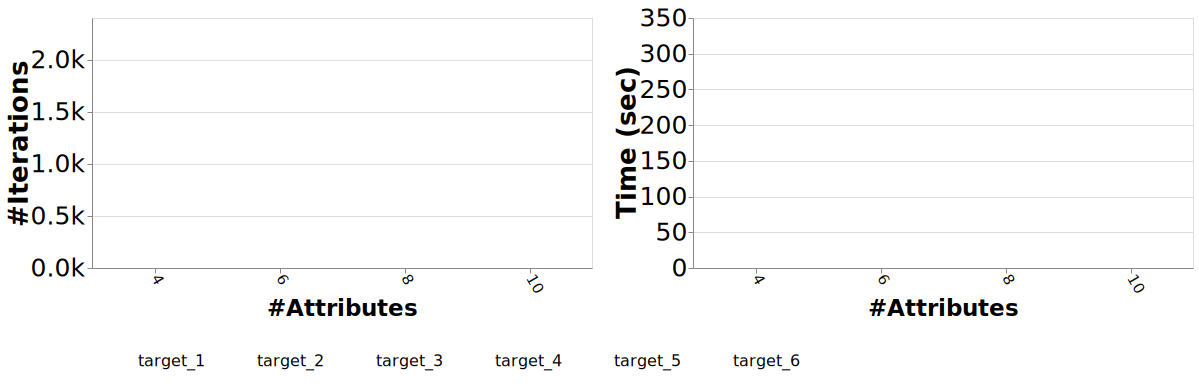

In [332]:
ite_graphs[0]|time_graphs[0] #Hybrid 9/1

WARN Dropping color encoding as the plot also has fill.
WARN Stacking is applied even though the aggregate function is non-summative ("mean").
WARN Dropping color encoding as the plot also has fill.
WARN Stacking is applied even though the aggregate function is non-summative ("mean").


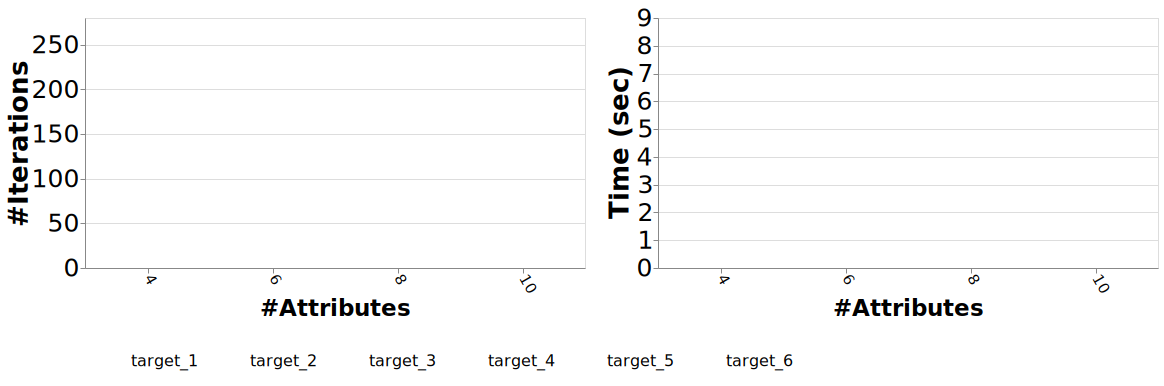

In [333]:
ite_graphs[1]|time_graphs[1] #MAB UCB

WARN Dropping color encoding as the plot also has fill.
WARN Stacking is applied even though the aggregate function is non-summative ("mean").
WARN Dropping color encoding as the plot also has fill.
WARN Stacking is applied even though the aggregate function is non-summative ("mean").


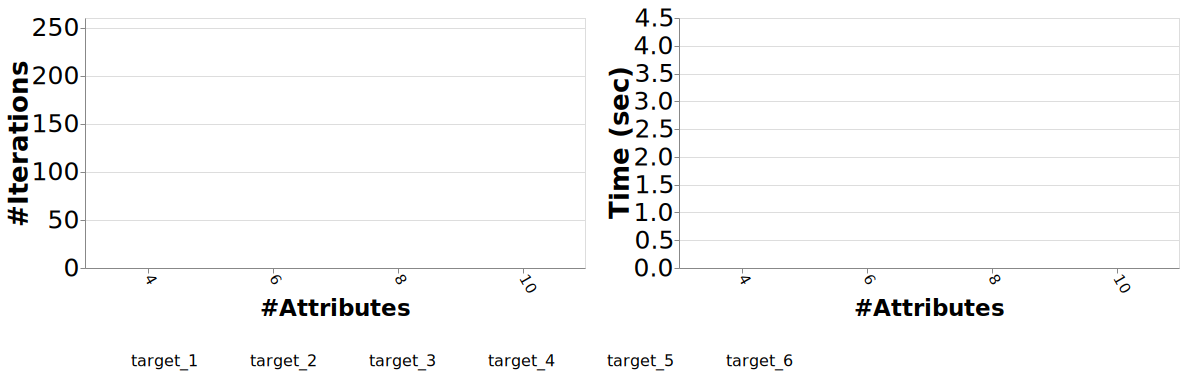

In [335]:
ite_graphs[3]|time_graphs[3] #MAB-Softmax